In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# location to save figures
import os
cwd = os.getcwd()
figure_path = cwd + '/figures/'

# (Non)Linear IA Models

In [3]:
from intrinsic_alignments.ia_models.linear_alingment_models import LinearAlignmentModel as LA
from intrinsic_alignments.ia_models.linear_alingment_models import NonLinearAlignmentModel as NLA

## Power Spectrum

In [4]:
# instantiate each model
# this takes some time
la = LA() 
nla = NLA() 

In [5]:
# get tabulated power spectrum from each model
k_1, pk_1 = la.power_spectrum
k_2, pk_2 = nla.power_spectrum

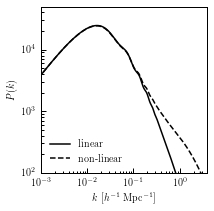

In [29]:
# plot the power spectrum for each model
fig = plt.figure(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
l1, = plt.plot(k_1, pk_1, '-', color='black')
l2, = plt.plot(k_2, pk_2, '--', color='black')
plt.yscale('log')
plt.xscale('log')
plt.ylim([100,50000])
plt.xlim([0.001,4])
plt.xlabel(r'$k~[h^{-1}~{\rm Mpc}^{-1}]$')
plt.ylabel(r'$P(k)$')
plt.legend([l1, l2],['linear', 'non-linear'], frameon=False, loc='lower left', fontsize=10)
plt.show()

filename = 'power_spectrums.pdf'
fig.savefig(figure_path+filename, dpi=250)

## Ellipticity Correlation Functions

In [20]:
# define radial bins for correlation functions
r = np.logspace(-1,2.2,50)

xi_1 = la.ii_plus(r)
xi_2 = nla.ii_plus(r)
xi_3 = la.ii_cross(r)
xi_4 = nla.ii_cross(r)

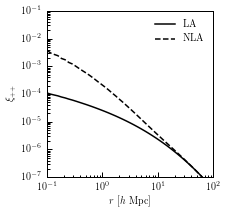

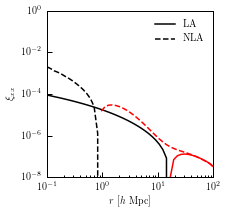

In [23]:
fig = plt.figure(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
l1, = plt.plot(r, xi_1, '-', color='black')
l2, = plt.plot(r, xi_2, '--', color='black')
plt.yscale('log')
plt.xscale('log')
plt.ylim([10**(-7),10**(-1)])
plt.xlim([0.1,100])
plt.xlabel(r'$r~[h~{\rm Mpc}]$')
plt.ylabel(r'$\xi_{++}$')
plt.legend([l1, l2],['LA', 'NLA'], frameon=False, loc='upper right', fontsize=10)
plt.show()

filename = 'nla_and_la_xi_pp.pdf'
fig.savefig(figure_path+filename, dpi=250)

fig = plt.figure(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
l1, = plt.plot(r, xi_3, '-', color='black')
l2, = plt.plot(r, xi_4, '--', color='black')
# plot the negative component
mask = (xi_3<0.0)
l3, = plt.plot(rp[mask], -1.0*xi_3[mask], '-', color='red')
mask = (xi_4<0.0)
l4, = plt.plot(rp[mask], -1.0*xi_4[mask], '--', color='red')
plt.yscale('log')
plt.xscale('log')
plt.ylim([10**(-8),10**(0)])
plt.xlim([0.1,100])
plt.xlabel(r'$r~[h~{\rm Mpc}]$')
plt.ylabel(r'$\xi_{xx}$')
plt.legend([l1, l2],['LA', 'NLA'], frameon=False, loc='upper right', fontsize=10)
plt.show()

filename = 'nla_and_la_xi_cc.pdf'
fig.savefig(figure_path+filename, dpi=250)

In [24]:
# define projected radial bins for correlation functions
rp = np.logspace(-1,2.2,50)

xi_6 = la.ii_plus_projected(r)
xi_7 = nla.ii_plus_projected(r)
xi_8 = la.ii_cross_projected(r)
xi_9 = nla.ii_cross_projected(r)

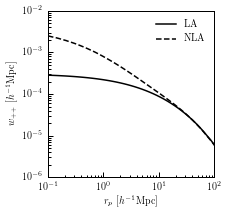

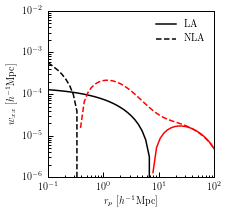

In [25]:
fig = plt.figure(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
l1, = plt.plot(rp, xi_6, '-', color='black')
l2, = plt.plot(rp, xi_7, '--', color='black')
plt.yscale('log')
plt.xscale('log')
plt.ylim([10**(-6),10**(-2)])
plt.xlim([0.1,100])
plt.xlabel(r'$r_p~[h^{-1}{\rm Mpc}]$')
plt.ylabel(r'$w_{++}~[h^{-1}{\rm Mpc}]$')
plt.legend([l1, l2],['LA', 'NLA'], frameon=False, loc='upper right', fontsize=10)
plt.show()

filename = 'nla_and_la_w_pp.pdf'
fig.savefig(figure_path+filename, dpi=250)

fig = plt.figure(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
l1, = plt.plot(rp, xi_8, '-', color='black')
l2, = plt.plot(rp, xi_9, '--', color='black')
# plot the negative component
mask = (xi_8<0.0)
l3, = plt.plot(rp[mask], -1.0*xi_8[mask], '-', color='red')
mask = (xi_9<0.0)
l4, = plt.plot(rp[mask], -1.0*xi_9[mask], '--', color='red')
plt.yscale('log')
plt.xscale('log')
plt.ylim([10**(-6),10**(-2)])
plt.xlim([0.1,100])
plt.xlabel(r'$r_p~[h^{-1}{\rm Mpc}]$')
plt.ylabel(r'$w_{xx}~[h^{-1}{\rm Mpc}]$')
plt.legend([l1, l2],['LA', 'NLA'], frameon=False, loc='upper right', fontsize=10)
plt.show()

filename = 'nla_and_la_w_cc.pdf'
fig.savefig(figure_path+filename, dpi=250)